
#<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #FFFFFF; text-align: center; line-height: 0.55;background-color: #FE251B"><b>Airline Travel Satisfaction</b><br></h1>

Problem Statement :
What are the factors influencing Satisfaction of airline passengers?  How can we predict customer satisfaction with the data we have?

Aim :
To predict customer satisfaction using multiple models and pick the best model

In [205]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import seaborn as sns

#import models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from IPython.display import Markdown


%matplotlib inline

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Dataset Information</div></center>

In [157]:
df = pd.read_csv('airline_clnd.csv')
df.head()

,SR,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [158]:
#check for null values
df.isnull().sum()

SR                                     0
id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction    

There are null values in Arrival delay, we will replace them with mean values

In [159]:
#fill mean arrival delya to the null values

df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].mean(), inplace=True)


In [160]:
#checking for unique values in satisfaction
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [161]:
# Applying the condition, satisfies = 1, otherwise = 0
df.loc[df["satisfaction"] == "satisfied", "satisfaction"] = 1
df.loc[df["satisfaction"] == "neutral or dissatisfied", "satisfaction"] = 0
df["satisfaction"] = pd.to_numeric(df['satisfaction'])
df

,SR,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,0
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,0


# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

In [163]:
# Check DataTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   SR                                 103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer_Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type_of_Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight_Distance                    103904 non-null  int64  
 8   Inflight_wifi_service              103904 non-null  int64  
 9   Departure/Arrival_time_convenient  103904 non-null  int64  
 10  Ease_of_Online_booking             103904 non-null  int64  
 11  Gate_location                      1039

In [164]:
df.describe()

,SR,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909,0.495538
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


<Axes: >

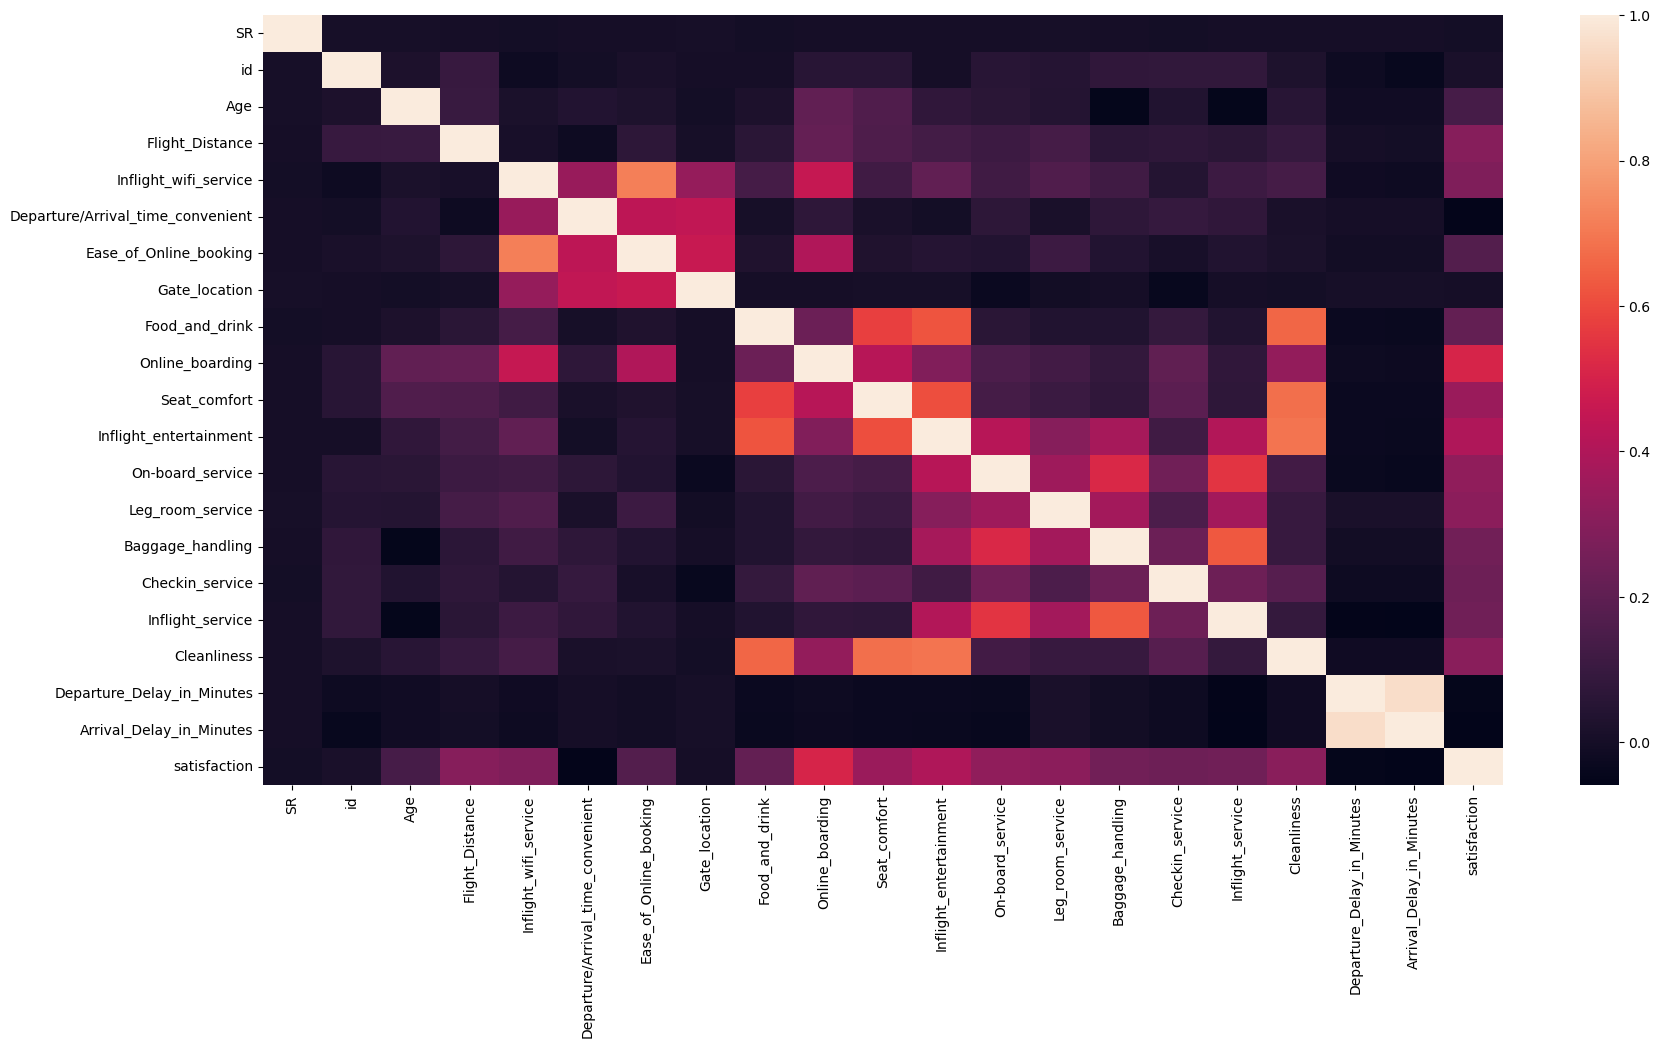

In [165]:
#lets do a simple correlation map
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(method='pearson',numeric_only = True), annot=False) 

### Proportion of men and women in the dataset

<Axes: title={'center': 'Male Female Distribution is balanced'}>

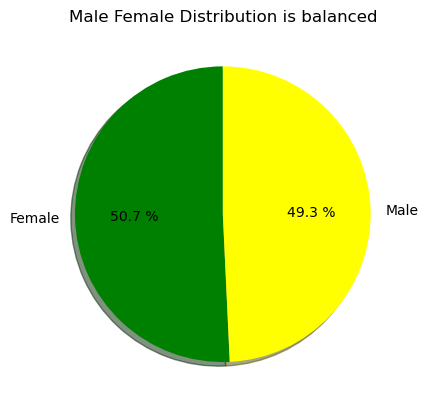

In [167]:

s = df['Gender']
s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=False, title="Male Female Distribution is balanced", 
                   shadow=True, startangle=90 , colors=['Green', 'Yellow'])


The male female distribution of the dataset is balanced

In [ ]:
# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Feature exploration</div></center>

### Customer type

<Axes: title={'center': '82% of the customers are loyal customers'}>

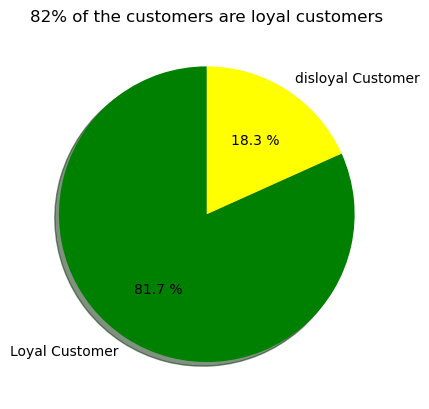

In [168]:
s2 = df['Customer_Type']
s2.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=False, title="82% of the customers are loyal customers", 
                   shadow=True, startangle=90 , colors=['Green', 'Yellow','Blue'])

### Type of travel

<Axes: title={'center': '70% of the customers are Business Travelers'}>

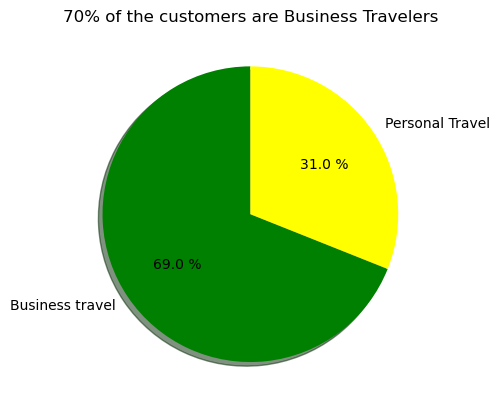

In [169]:
s3 = df['Type_of_Travel']
s3.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=False, title="70% of the customers are Business Travelers", 
                   shadow=True, startangle=90 , colors=['Green', 'Yellow','Blue'])



### Flight distance

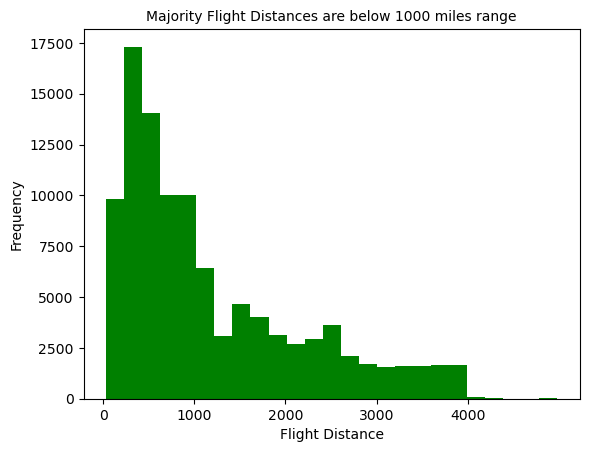

In [170]:
plt.hist(df['Flight_Distance'], bins=25, color='Green')
# Set the font size for the y-axis label
plt.ylabel('Frequency', fontsize=10)  # Adjust the font size as needed
plt.yticks( fontsize=10)
plt.xticks(range(0, max(df['Flight_Distance']) + 1, 1000),fontsize=10 )
# Customize the plot (optional)
plt.xlabel('Flight Distance', fontsize=10)
plt.title('Majority Flight Distances are below 1000 miles range', fontsize=10)


# Show the plot
plt.show()

### Flight distance and age

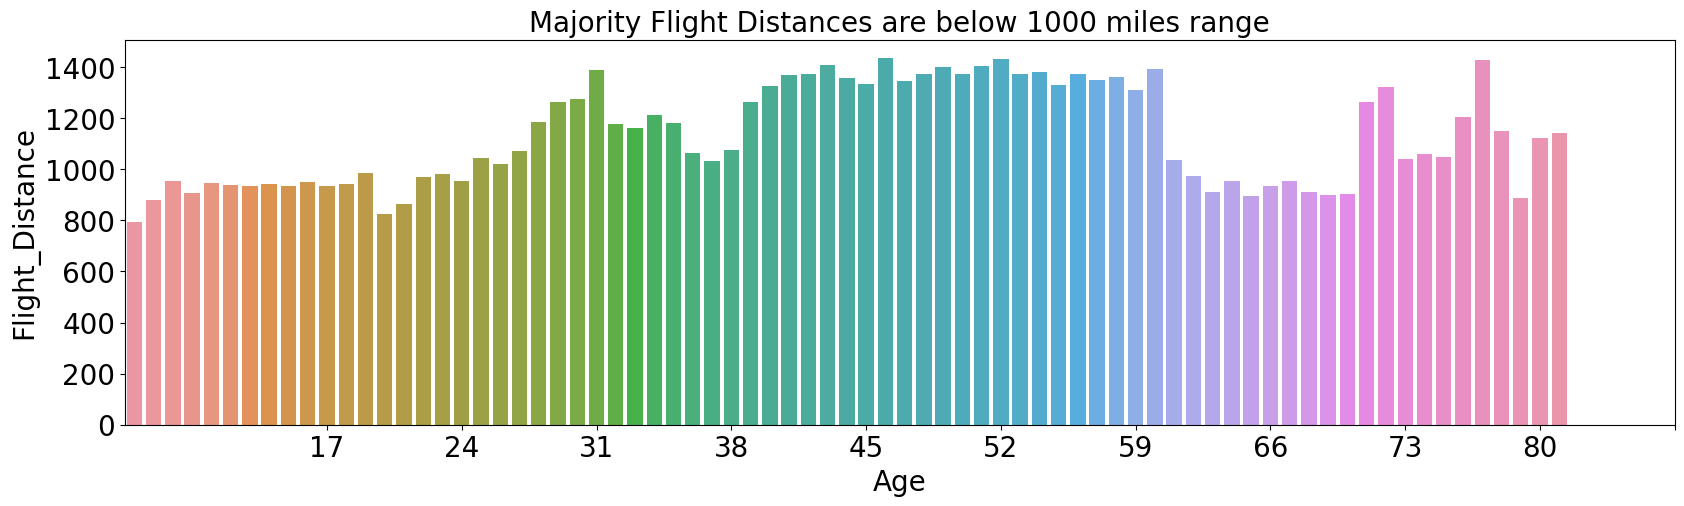

In [206]:
sns.barplot(data=df, x='Age', y='Flight_Distance', errorbar=None)
# Customize the plot (optional)
plt.xticks(range(10, max(df['Age']) + 1, 7),fontsize=20 )
plt.ylabel("Flight_Distance", fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.title('Majority Flight Distances are below 1000 miles range', fontsize=20)
plt.gcf().set_size_inches(20,5)
plt.show()



Customers above 30 years tend to travel more than 1000(miles) flight distance.

Customers above the age of705 tend to travel  ahighet distance,than age650 - 70 group .

### Filght distance and Delays scatter plot

Text(0, 0.5, 'Delay in minutes')

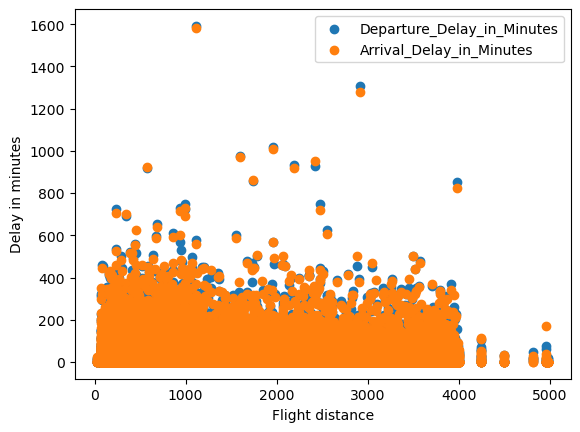

In [172]:
plt.scatter (df['Flight_Distance'], df['Departure_Delay_in_Minutes'])
plt.scatter (df['Flight_Distance'], df['Arrival_Delay_in_Minutes'])
plt.legend(['Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']) 
plt.xlabel('Flight distance')
plt.ylabel('Delay in minutes')

we can say that the arrival delay is directly proportional to the delay in departure, however, the arrival/ departure delay has nothing to do with flight distance.

### Online Boarding

In [173]:
df['Online_boarding'].corr(df['satisfaction'])


0.5035573216470103

Online boarding expereince has a direct correlation to the customer satisfaction

Satisfaction by inflight entertainment and inlfight wifi

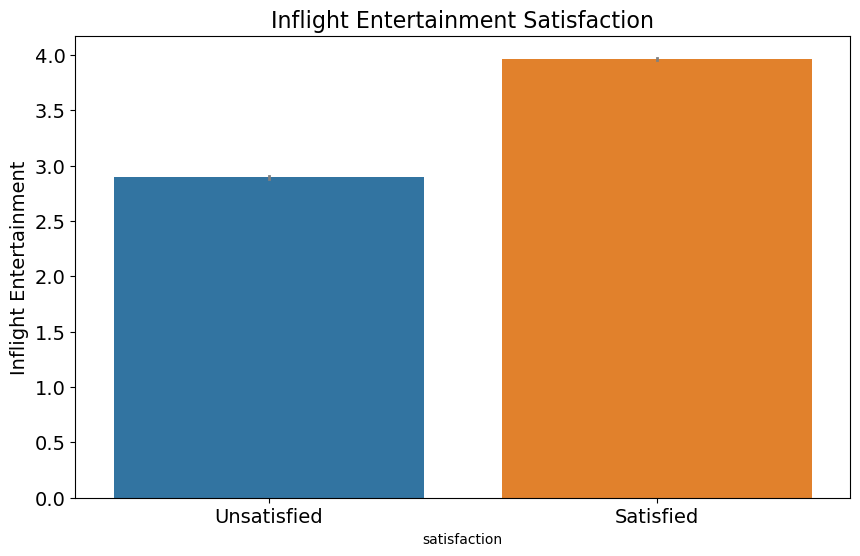

In [218]:
# Plot the bar plot with hue
sns.barplot(data=df, x='satisfaction', y='Inflight_entertainment', errcolor='gray', errwidth=2)

# Customize the plot
plt.xticks([0, 1], ['Unsatisfied', 'Satisfied'], fontsize=14) 
plt.ylabel("Inflight Entertainment", fontsize=14)
plt.yticks(fontsize=14)
plt.title('Inflight Entertainment Satisfaction', fontsize=16)
plt.gcf().set_size_inches(10, 6)

# Show plot
plt.show()


Better inflight entertainment will lead to higher customer satisfation

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Feature Engineering</div></center>

#feature selection option 1, using correlation chart above, select the highest correlated

In [175]:
 # Specify the columns that are correlated
List_of_features_corr = ['Online_boarding', 'Inflight_wifi_service', 'Departure_Delay_in_Minutes', 'Inflight_entertainment', 
                    'Flight_Distance', 'Food_and_drink', 'Seat_comfort', 'On-board_service', 'Leg_room_service', 'Cleanliness']

features_data_option1 = df[List_of_features_corr].values.tolist()  # Convert selected columns to a list

#feature selection using correlation analysis

In [176]:
df2= df.copy(deep=True)

In [177]:
#Select the list of features from the correlation analysys
data_selected = df[List_of_features_corr]
data_selected.head()

,Online_boarding,Inflight_wifi_service,Departure_Delay_in_Minutes,Inflight_entertainment,Flight_Distance,Food_and_drink,Seat_comfort,On-board_service,Leg_room_service,Cleanliness
0,3,3,25,5,460,5,5,4,3,5
1,3,3,1,1,235,1,1,1,5,1
2,5,2,0,5,1142,5,5,4,3,5
3,2,2,11,2,562,2,2,2,5,2
4,5,3,0,3,214,4,5,3,4,3


Pre-processing data using standard scaler

In [178]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data using the scaler
data_scaled = scaler.fit_transform(data_selected)

# Create a new DataFrame with the scaled data and original column names
df_scaled = pd.DataFrame(data_scaled, columns=List_of_features_corr)
df_scaled.head()


,Online_boarding,Inflight_wifi_service,Departure_Delay_in_Minutes,Inflight_entertainment,Flight_Distance,Food_and_drink,Seat_comfort,On-board_service,Leg_room_service,Cleanliness
0,-0.185532,0.203579,0.266393,1.231704,-0.731539,1.352264,1.183099,0.479403,-0.26684,1.305870
1,-0.185532,0.203579,-0.361375,-1.769081,-0.957184,-1.656326,-1.849315,-1.849161,1.25338,-1.742292
2,1.296496,-0.549533,-0.387532,1.231704,-0.047584,1.352264,1.183099,0.479403,-0.26684,1.305870
3,-0.926545,-0.549533,-0.099805,-1.018885,-0.629246,-0.904178,-1.091211,-1.072973,1.25338,-0.980251
4,1.296496,0.203579,-0.387532,-0.268688,-0.978244,0.600117,1.183099,-0.296785,0.49327,-0.218211


In [179]:
#Add satisfaction to the dataframe
df_scaled['satisfaction'] = df['satisfaction']
df_scaled

,Online_boarding,Inflight_wifi_service,Departure_Delay_in_Minutes,Inflight_entertainment,Flight_Distance,Food_and_drink,Seat_comfort,On-board_service,Leg_room_service,Cleanliness,satisfaction
0,-0.185532,0.203579,0.266393,1.231704,-0.731539,1.352264,1.183099,0.479403,-0.266840,1.305870,0
1,-0.185532,0.203579,-0.361375,-1.769081,-0.957184,-1.656326,-1.849315,-1.849161,1.253380,-1.742292,0
2,1.296496,-0.549533,-0.387532,1.231704,-0.047584,1.352264,1.183099,0.479403,-0.266840,1.305870,1
3,-0.926545,-0.549533,-0.099805,-1.018885,-0.629246,-0.904178,-1.091211,-1.072973,1.253380,-0.980251,0
4,1.296496,0.203579,-0.387532,-0.268688,-0.978244,0.600117,1.183099,-0.296785,0.493270,-0.218211,1
...,...,...,...,...,...,...,...,...,...,...,...
103899,-0.926545,-0.549533,-0.309061,-1.018885,-1.000307,-0.904178,-1.091211,-0.296785,-1.787061,-0.980251,0
103900,0.555482,0.956691,-0.387532,1.231704,1.160869,-0.904178,1.183099,1.255590,1.253380,0.543829,1
103901,-1.667559,-1.302646,-0.204433,0.481508,0.807860,0.600117,1.183099,-0.296785,-1.026951,0.543829,0
103902,-1.667559,-1.302646,-0.387532,-1.769081,-0.189991,-1.656326,-1.849315,0.479403,1.253380,-1.742292,0


I carried out dominance analysis as the second option for feature engineering.  The following features were selected from the algorithm

1. Online Boarding
2. Infight entertainment
3. Flight distance
4. Leg room service
5. On board service
6. Seat Comfort
7. Inflight Wifi service

In [180]:
 # Specify the columns from the dominance analysis
List_of_features_Dom = ['Online_boarding', 'Inflight_entertainment', 'Flight_Distance', 'Leg_room_service', 
                    'On-board_service',  'Seat_comfort', 'Inflight_wifi_service']
#Create a new DF from the selected features for analysis
List_of_features_Dom

['Online_boarding',
 'Inflight_entertainment',
 'Flight_Distance',
 'Leg_room_service',
 'On-board_service',
 'Seat_comfort',
 'Inflight_wifi_service']

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Modeling</div></center>

# Model evaluation with Option 1 feature selection (Logistic regression, GaussianNB and Random Forest)

In [181]:
#a function to develop the model using classifier as the variable
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)

#a function to evaluate the model
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='', annot_kws={'size': 12})
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [219]:
#Create three classification models
#the hyper parameters were allocated after hyper parameter testing
classifier_Log = LogisticRegression(C=100, penalty='l1', solver='liblinear', max_iter=1000)
classifier_GNB = GaussianNB()
classifier_GNB.set_params(priors=None, var_smoothing=1e-09)
classifier_RF = RandomForestClassifier()

In [220]:
#create features from the scaled dataframe
X1 = df_scaled[List_of_features_corr]
y1 = df_scaled['satisfaction']

#Tran test split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 2)


In [184]:
#Find the best hyper parameters for Log reg model

lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100],
    'solver': ['liblinear']
}

#Create a GridSearchCV object
grid_search = GridSearchCV(classifier_Log, lr_params, scoring='accuracy')

#Fit the GridSearchCV to  training data:
grid_search.fit(x_train1, y_train1)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8192197659693026


              precision    recall  f1-score   support

           0       0.83      0.86      0.84     11764
           1       0.80      0.76      0.78      9017

    accuracy                           0.82     20781
   macro avg       0.81      0.81      0.81     20781
weighted avg       0.82      0.82      0.82     20781



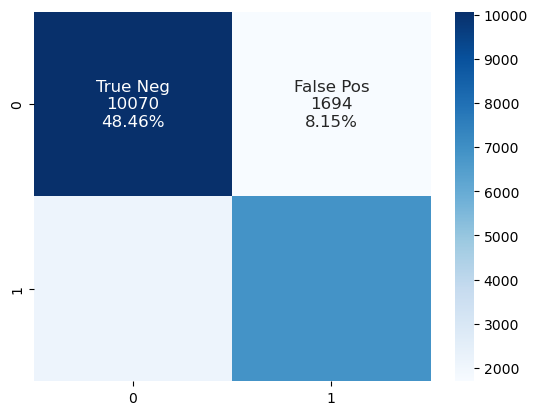

In [185]:
#run the log reg model
model(classifier_Log,x_train1,y_train1,x_test1,y_test1)

#evaluate the model
model_evaluation(classifier_Log,x_test1,y_test1)

In [186]:
# Define hyperparameters to search through for Gausian model
param_grid = {
    'priors': [None],  # You can specify priors if you have prior knowledge about class probabilities
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Adjust the values as needed
}

# Grid search to find the best parameters
grid_search = GridSearchCV(classifier_GNB, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train1, y_train1)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'priors': None, 'var_smoothing': 1e-09}
Best Score: 0.7947379427876717


              precision    recall  f1-score   support

           0       0.84      0.78      0.81     11764
           1       0.74      0.81      0.77      9017

    accuracy                           0.79     20781
   macro avg       0.79      0.79      0.79     20781
weighted avg       0.79      0.79      0.79     20781



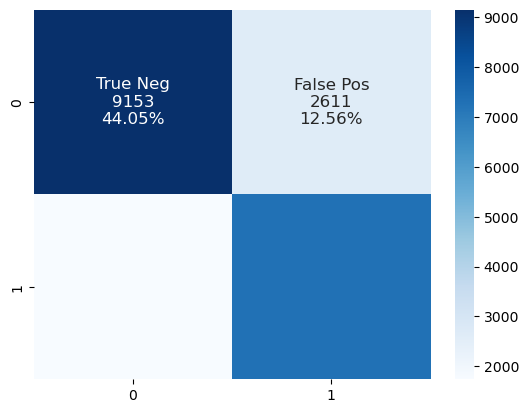

In [187]:
#run the gausian NB model
model(classifier_GNB,x_train1,y_train1,x_test1,y_test1)


#evaluate the model
model_evaluation(classifier_GNB,x_test1,y_test1)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     11764
           1       0.92      0.89      0.90      9017

    accuracy                           0.92     20781
   macro avg       0.92      0.92      0.92     20781
weighted avg       0.92      0.92      0.92     20781



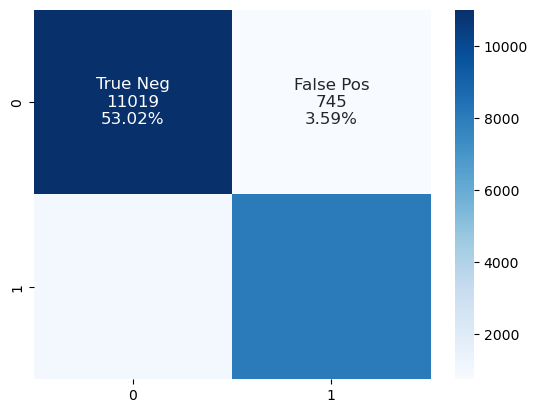

In [188]:
#run the Random Forest
model(classifier_RF,x_train1,y_train1,x_test1,y_test1)


model_evaluation(classifier_RF,x_test1,y_test1)

# Model evaluation with Option 2 feature selection (Logistic regression, GaussianNB and Random Forest)

In [190]:
#define X and y variables
X2 = df_scaled[List_of_features_Dom]
y2 = df_scaled['satisfaction']


## Create training and testing subsets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)


In [221]:
#Create three models again for dominance analysis dataset
#the hyper parameters were allocated after hyper parameter testing
Dom_Log = LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=1000)
Dom_GNB = GaussianNB(priors= None, var_smoothing= 1e-09)
Dom_RF = RandomForestClassifier()

In [192]:
#Find the best hyper parameters for Log reg model

lr_params2 = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100],
    'solver': ['liblinear']
}

#Create a GridSearchCV object
grid_search = GridSearchCV(Dom_Log, lr_params2, scoring='accuracy')

#Fit the GridSearchCV to  training data:
grid_search.fit(X_train2, y_train2)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8178409825468649


              precision    recall  f1-score   support

           0       0.83      0.85      0.84     19334
           1       0.80      0.77      0.79     14955

    accuracy                           0.82     34289
   macro avg       0.82      0.81      0.81     34289
weighted avg       0.82      0.82      0.82     34289



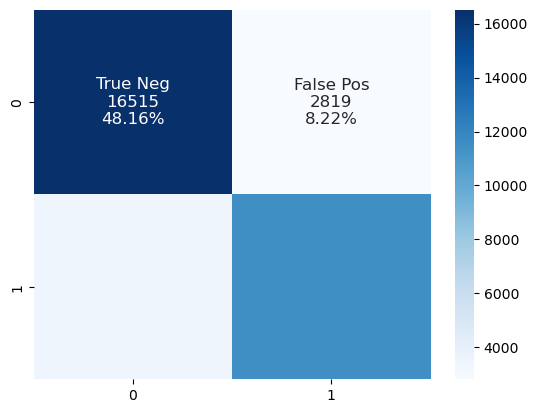

In [193]:
#run the log reg model
model(Dom_Log,X_train2,y_train2,X_test2,y_test2)

#evaluate the model
model_evaluation(Dom_Log,X_test2,y_test2)

In [194]:
# Define hyperparameters to search through for Gausian model
param_grid2 = {
    'priors': [None],  # You can specify priors if you have prior knowledge about class probabilities
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Adjust the values as needed
}

# Grid search to find the best parameters
grid_search = GridSearchCV(Dom_GNB, param_grid2, cv=5, scoring='accuracy')
grid_search.fit(X_train2, y_train2)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'priors': None, 'var_smoothing': 1e-09}
Best Score: 0.820814479638009


              precision    recall  f1-score   support

           0       0.85      0.83      0.84     19334
           1       0.78      0.81      0.80     14955

    accuracy                           0.82     34289
   macro avg       0.82      0.82      0.82     34289
weighted avg       0.82      0.82      0.82     34289



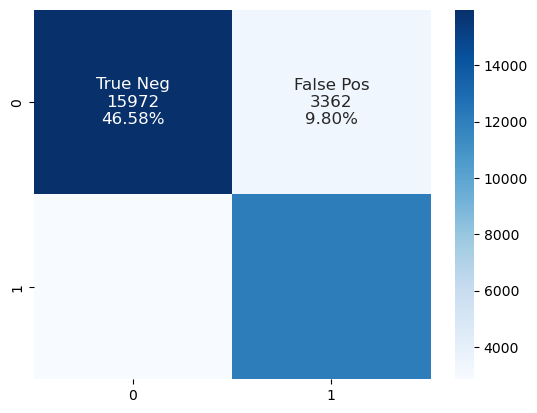

In [195]:
#run the gausian NB model
model(Dom_GNB,X_train2,y_train2,X_test2,y_test2)


#evaluate the model
model_evaluation(Dom_GNB,X_test2,y_test2)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     19334
           1       0.89      0.88      0.88     14955

    accuracy                           0.90     34289
   macro avg       0.90      0.90      0.90     34289
weighted avg       0.90      0.90      0.90     34289



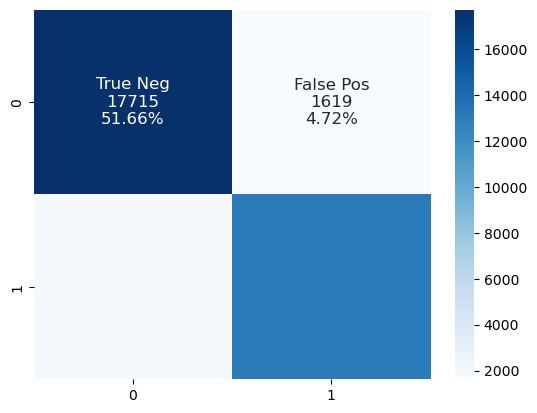

In [196]:
#run the Random Forest
model(Dom_RF,X_train2,y_train2,X_test2,y_test2)


model_evaluation(Dom_RF,X_test2,y_test2)

In [198]:
#print F1 score for each model
print("Log regression1 F1 score:", f1_score(y_test1, classifier_Log.predict(x_test1),average='weighted')),
print("GaussianNB1 F1 score:", f1_score(y_test1, classifier_GNB.predict(x_test1),average='weighted')),
print("Random Forest1 F1 score:", f1_score(y_test1, classifier_RF.predict(x_test1),average='weighted')),
print("Log regression2 F1 score:", f1_score(y_test2, Dom_Log.predict(X_test2),average='weighted')),
print("GaussianNB2 F1 score:", f1_score(y_test2, Dom_GNB.predict(X_test2),average='weighted')),
print("Random Forest2 F1 score:", f1_score(y_test2, Dom_RF.predict(X_test2),average='weighted')),


Log regression1 F1 score: 0.815828940113484
GaussianNB1 F1 score: 0.7914247726153683
Random Forest1 F1 score: 0.9180744430860537
Log regression2 F1 score: 0.8170009306005646
GaussianNB2 F1 score: 0.8190541274494493
Random Forest2 F1 score: 0.8985595065920619


(None,)

# Model and feature selection evaluation

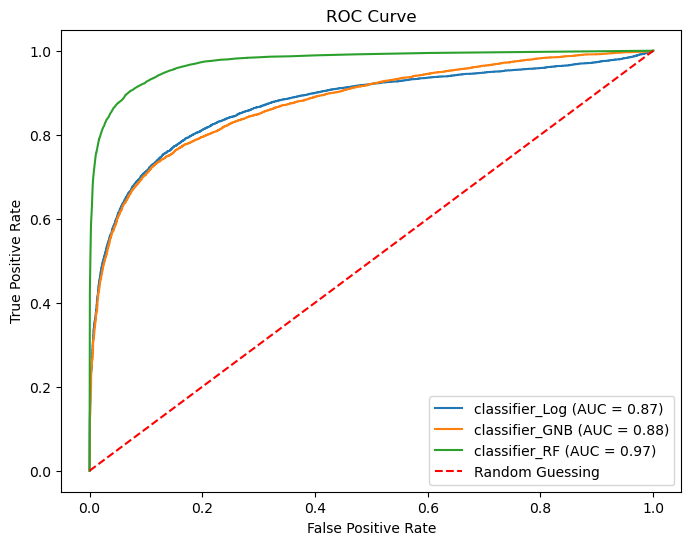

In [199]:

# Define your models and their names
models = [classifier_Log, classifier_GNB, classifier_RF]
model_names = ["classifier_Log", "classifier_GNB", "classifier_RF"]

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))
for model, name in zip(models, model_names):
    # Assuming X_test and y_test are your test data
    if hasattr(model, "decision_function"):
        y_score1 = model.decision_function(x_test1)
    else:
        y_score1 = model.predict_proba(x_test1)[:, 1]
        
    fpr, tpr, _ = roc_curve(y_test1, y_score1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Option 1 Feature Engineering')
plt.legend(loc='lower right')

# Show plot
plt.show()

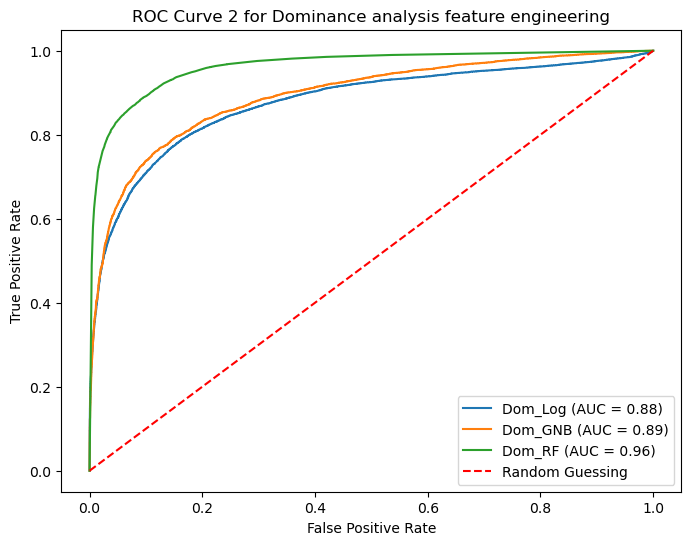

In [201]:

# Define your models and their names
models = [Dom_Log, Dom_GNB, Dom_RF]
model_names = ["Dom_Log", "Dom_GNB", "Dom_RF"]

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))
for model, name in zip(models, model_names):
    # Assuming X_test and y_test are your test data
    if hasattr(model, "decision_function"):
        y_score2 = model.decision_function(X_test2)
    else:
        y_score2 = model.predict_proba(X_test2)[:, 1]
        
    fpr, tpr, _ = roc_curve(y_test2, y_score2)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve 2 for Dominance analysis feature engineering')
plt.legend(loc='lower right')

# Show plot
plt.show()

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Conclusion</div></center>
    

In [233]:


# Assuming best_model is your best model object
best_model_name = "Random Forest"  # Replace this with the actual name of your best model
Second_best_model_name = "Random Forest Classifier"  # Replace this with the actual name of your best model

# Print message with Markdown formatting for font size
display(Markdown(f"<font size='4'>Best model is <b>{best_model_name}</b> using both correlation and dominance analysis.  </font>"))


<font size='4'>Best model is <b>Random Forest</b> using both correlation and dominance analysis.  </font>

### The most important factors that driving the passenger’s satisfaction are: 

 - Online Boarding
 - Inflight Entertainment
 - Flight Distance
 - Leg room service
 - On board service
 - Seat comfort
 - Inflight wifi service

### In addition to above other important aspects in the flight journey are: 
 - Departure Delay 
 - Food and drink
 - Leg room service
 - Cleanliness